In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded= files.upload()

Saving movie.csv to movie (2).csv


In [3]:
df=pd.read_csv("movie.csv")
df.head()


,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [4]:
df.describe()


,label
count,40000.000000
mean,0.499525
std,0.500006
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [5]:
df.shape

(40000, 2)

In [6]:
#checking for duplicate entries
df.duplicated().sum()


np.int64(277)

In [7]:
df = df.drop_duplicates()

In [8]:
#checking for unique values in column 2(if any value except 0/1)
df['label'].unique()


array([0, 1])

In [9]:
#checking for null values
df.isnull().sum()
#we get no null values and no reduncnaies

,0
text,0
label,0


In [10]:
df = df[df['label'].isin([0, 1])]

In [11]:
print(df['label'].value_counts())

label
1    19908
0    19815
Name: count, dtype: int64


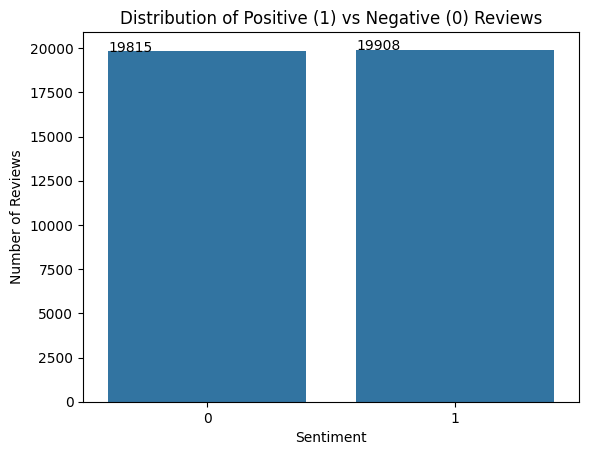

In [12]:
#now looking at number of positive and negative reviews
ax= sns.countplot(x='label', data=df)
plt.title("Distribution of Positive (1) vs Negative (0) Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
for bar in ax.patches:
    plt.text(bar.get_x(), bar.get_height(), str(int(bar.get_height())))
plt.show()

In [13]:
df['review_length'] = df['text'].apply(len)

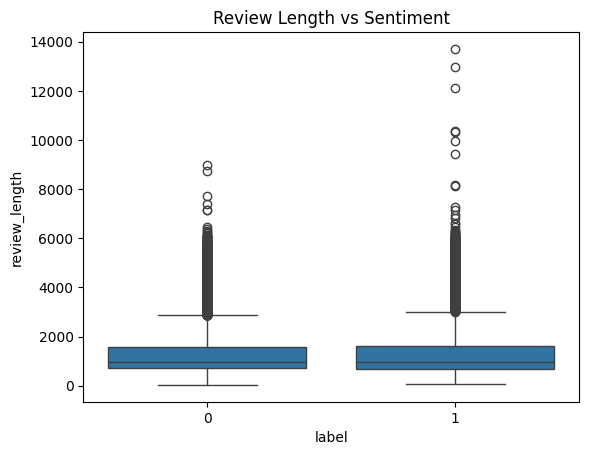

In [14]:
#boxplot:easy tpo find outliers and median etc, becomes easier to compare
sns.boxplot(data=df, x='label', y='review_length')
plt.title("Review Length vs Sentiment")
plt.show()
#plot shows that review length is almost same for boht, might be little longer for postive reviews as more outliers

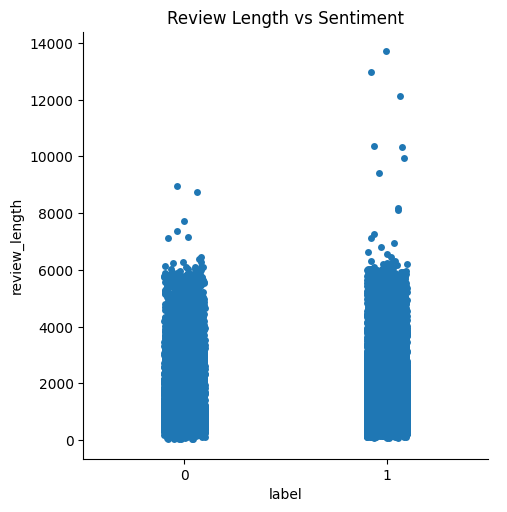

In [15]:
#i created a catplot as well, as i wasnt sure which out of boxplot and catplot willl show better comparison, both gave out same inference
sns.catplot(data=df, x='label', y='review_length')
plt.title("Review Length vs Sentiment")
plt.show()

In [16]:
#DATA PREPROCESSING
#importing necessary things
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer


In [17]:

#downloading nltk resorices
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
#intialising tools
stop_words=set(stopwords.words('english'))
lemmatizer=WordNetLemmatizer()

In [19]:
#creating function so that can work easily
def preprocessing(text):
  #all upper case to all lower case
  text=text.lower()
  #removing special charcters etc
  text=re.sub(r'[^a-z\s]', '', text)

  #tokenisation
  tokens=word_tokenize(text)
  #Remove stopwords
  tokens=[word for word in tokens if word not in stop_words]
  #lemmatization
  tokens=[lemmatizer.lemmatize(word) for word in tokens]

  return ' '.join(tokens)

df['clean text']=df['text'].apply(preprocessing)

#checking final result; now we get two columns, text and clean text
df[['text','clean text']].head()


,text,clean text
0,I grew up (b. 1965) watching and loving the Th...,grew b watching loving thunderbird mate school...
1,"When I put this movie in my DVD player, and sa...",put movie dvd player sat coke chip expectation...
2,Why do people who do not know what a particula...,people know particular time past like feel nee...
3,Even though I have great interest in Biblical ...,even though great interest biblical movie bore...
4,Im a die hard Dads Army fan and nothing will e...,im die hard dad army fan nothing ever change g...


In [20]:
#splittting and training data
from sklearn.model_selection import train_test_split

X = df['clean text']  # input: cleaned text
y = df['label']       # output: target class

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a vectorizer object
vectorizer = TfidfVectorizer()

# Fit on training data and transform both train and test
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [22]:
from sklearn.naive_bayes import MultinomialNB
#creates Naive Bayes model,stores it in the variable model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)


MultinomialNB()

In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on test data
y_pred = model.predict(X_test_tfidf)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Detailed metrics
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.865449968533669
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.87      3991
           1       0.87      0.86      0.86      3954

    accuracy                           0.87      7945
   macro avg       0.87      0.87      0.87      7945
weighted avg       0.87      0.87      0.87      7945

Confusion Matrix:
 [[3481  510]
 [ 559 3395]]


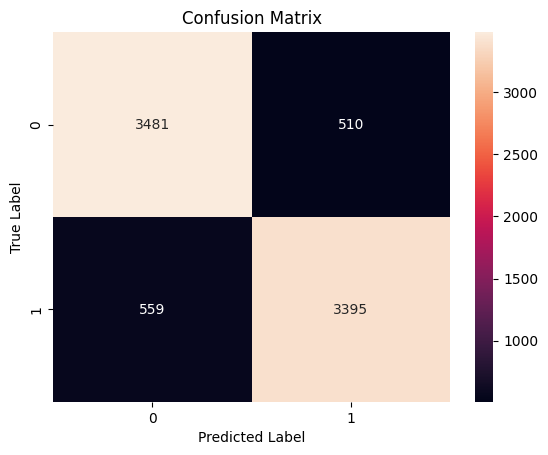

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [25]:
# trying Logistic Regression to see if it does better
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train_tfidf, y_train)

# Predicting on the test data
y_pred_logreg = logreg.predict(X_test_tfidf)

# accuracy and analysis to compare
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print( classification_report(y_test, y_pred_logreg))


Logistic Regression Accuracy: 0.8852108244178729
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      3991
           1       0.87      0.90      0.89      3954

    accuracy                           0.89      7945
   macro avg       0.89      0.89      0.89      7945
weighted avg       0.89      0.89      0.89      7945



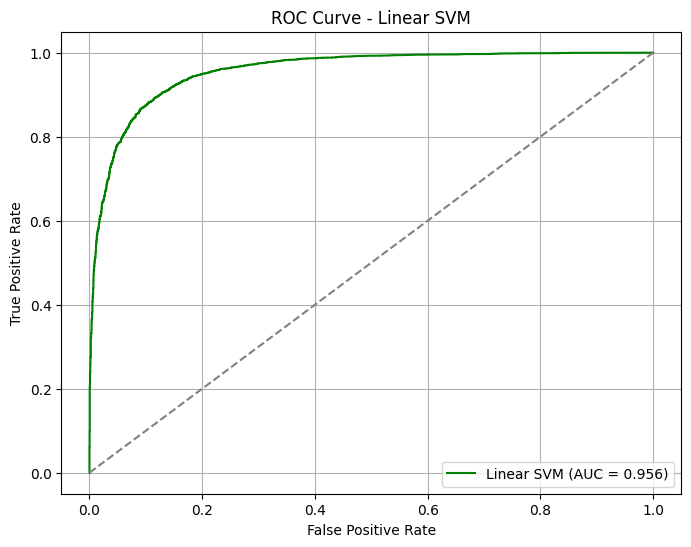

In [26]:
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_curve, roc_auc_score

# Linear SVM model
base_svm = LinearSVC(max_iter=10000)
svm_model = CalibratedClassifierCV(base_svm)  # Allows probability predictions
svm_model.fit(X_train_tfidf, y_train)

#predictions
y_pred_svm = svm_model.predict(X_test_tfidf)

# predicted probabilities for ROC curve
y_prob_svm = svm_model.predict_proba(X_test_tfidf)[:, 1]  # probability of class 1

#Compute ROC AUC
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
auc_svm = roc_auc_score(y_test, y_prob_svm)

#plotting the ROC curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, label=f'Linear SVM (AUC = {auc_svm:.3f})', color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')  # baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Linear SVM')
plt.legend()
plt.grid(True)
plt.show()


ROC AUC Score for Random Forest: 0.925


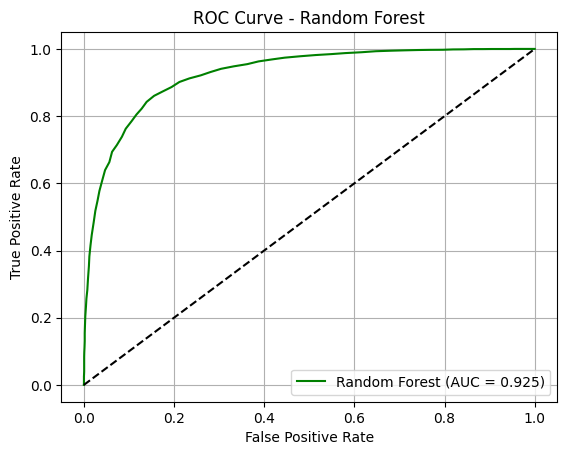

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

# Predict probabilities for class 1
y_probs_rf = rf_model.predict_proba(X_test_tfidf)[:, 1]

# Compute ROC curve and AUC score
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_probs_rf)
auc_score_rf = roc_auc_score(y_test, y_probs_rf)

# Print AUC score
print(f'ROC AUC Score for Random Forest: {auc_score_rf:.3f}')

# Plot ROC Curve
plt.figure()
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_score_rf:.3f})', color='green')
plt.plot([0, 1], [0, 1], 'k--')  # baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.grid(True)
plt.show()


ROC AUC Score for Naive Bayes: 0.939


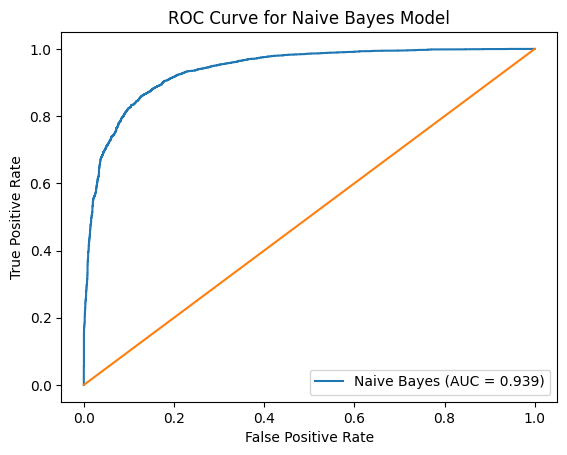

In [28]:
# checking the ROC curve for Naive Bayes to understand how well it separates classes

from sklearn.metrics import roc_curve, roc_auc_score

# getting predicted probabilities for positive class (label=1)
y_probs = model.predict_proba(X_test_tfidf)[:, 1]

# calculating false , true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate Area Under the Curve score
auc_score = roc_auc_score(y_test, y_probs)
print(f'ROC AUC Score for Naive Bayes: {auc_score:.3f}')

# Plotting curve
plt.figure()
plt.plot(fpr, tpr, label=f'Naive Bayes (AUC = {auc_score:.3f})')
plt.plot([0,1], [0,1])  # baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes Model')
plt.legend()
plt.show()


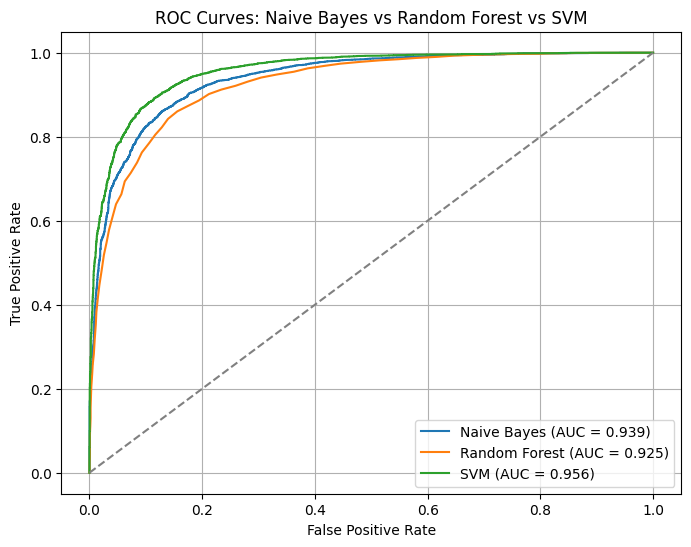

In [29]:
#plotting all 3 together
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

#predicted probabilities for each model (for class = 1)
nb_probs = model.predict_proba(X_test_tfidf)[:, 1]           # Naive Bayes
rf_probs = rf_model.predict_proba(X_test_tfidf)[:, 1]        # Random Forest
svm_probs = svm_model.predict_proba(X_test_tfidf)[:, 1]      # SVM

#ROC curve points
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)

# AUC scores
nb_auc = roc_auc_score(y_test, nb_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
svm_auc = roc_auc_score(y_test, svm_probs)

# plotting
plt.figure(figsize=(8, 6))
plt.plot(nb_fpr, nb_tpr, label=f'Naive Bayes (AUC = {nb_auc:.3f})')
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.3f})')
plt.plot(svm_fpr, svm_tpr, label=f'SVM (AUC = {svm_auc:.3f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves: Naive Bayes vs Random Forest vs SVM')
plt.legend()
plt.grid(True)
plt.show()

#RESULT- since SVM has highest AUC it is the best model

In [30]:
''' from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Build a simple neural network model
nn_model = Sequential()
nn_model.add(Dense(128, activation='relu', input_shape=(X_train_tfidf.shape[1],)))
nn_model.add(Dense(64, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))  # Binary classification → 1 output neuron

# Compile the model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
nn_model.fit(X_train_tfidf.toarray(), y_train, epochs=5, batch_size=32, verbose=1)

# Predict probabilities on test data
y_probs_nn = nn_model.predict(X_test_tfidf.toarray()).flatten()

# ROC AUC score
auc_nn = roc_auc_score(y_test, y_probs_nn)
print(f'Neural Network ROC AUC Score: {auc_nn:.3f}')

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs_nn)
plt.plot(fpr, tpr, label=f'Neural Net (AUC = {auc_nn:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Neural Network')
plt.legend()
plt.grid(True)
plt.show() '''


" from tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import Dense\nfrom sklearn.metrics import roc_auc_score, roc_curve\nimport matplotlib.pyplot as plt\n\n# Build a simple neural network model\nnn_model = Sequential()\nnn_model.add(Dense(128, activation='relu', input_shape=(X_train_tfidf.shape[1],)))\nnn_model.add(Dense(64, activation='relu'))\nnn_model.add(Dense(1, activation='sigmoid'))  # Binary classification → 1 output neuron\n\n# Compile the model\nnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])\n\n# Train the model\nnn_model.fit(X_train_tfidf.toarray(), y_train, epochs=5, batch_size=32, verbose=1)\n\n# Predict probabilities on test data\ny_probs_nn = nn_model.predict(X_test_tfidf.toarray()).flatten()\n\n# ROC AUC score\nauc_nn = roc_auc_score(y_test, y_probs_nn)\nprint(f'Neural Network ROC AUC Score: {auc_nn:.3f}')\n\n# Plot ROC curve\nfpr, tpr, _ = roc_curve(y_test, y_probs_nn)\nplt.plot(fpr, tpr, label=f'Neural Ne

In [31]:
# didnt understand this but according to chatgpt i should save the model and vectorizer so I don’t have to retrain every time i run the notebook
import joblib

joblib.dump(model, 'naive_bayes_model.joblib')
joblib.dump(vectorizer, 'tfidf_vectorizer.joblib')


['tfidf_vectorizer.joblib']